## Explore some professional seismic wave Python code
This code uses a library called obspy, described as a Python Toolbox for seismology and seismological observatories. The code comes from the Physical Acoustics Laboratory in Aukland, New Zealand. 

In [1]:
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from obspy.taup import TauPyModel

In [2]:
def main():
    # estimate the epicentral distance. This is one of your free parameters:
    Delta = 35 # in degrees
    # estimate the origin time of the earthquake; your other free parameter:
    t0=UTCDateTime("2014-04-13T12:25:19")

    maxamp = readandplotseismogram("http://pal.blogs.auckland.ac.nz/files/2014/08/quake.sac_.gz")
    computeandplottts(Delta,t0,maxamp)

    # tighten up the axes, and show:
    plt.axis('tight')
    plt.show()
    #return

In [3]:
def readandplotseismogram(seismogram):
    '''read and plot the seismogram'''
    # read the stream
    st = read(seismogram)
    starttime = UTCDateTime("2014-04-13T12:38:00")
    st.trim(starttime,starttime+1000)
    # the trace in the stream is
    tr = st[0]
    # Make a time array and an amps array:
    t1= tr.stats.starttime.timestamp
    t2= tr.stats.endtime.timestamp
    npts = tr.stats.npts
    times = np.linspace(t1,t2,npts)
    amps = tr.data
    maxamp = max(amps)
    #Plot the seismogram against a grid
    plt.figure(figsize=(12,3))
    plt.plot(times,amps,color='blue')
    #Converting tick marks to actual times:
    locs, labels = plt.xticks()
    new_label=[]
    for loc in locs:
        new_label.append(UTCDateTime(loc).strftime("%H-%M-%S"))
        plt.xticks(locs,new_label,rotation=10)
        plt.xlabel('Time (HH-MM-SS UTC)')
        plt.ylabel('Displacement')
        plt.grid()
    return maxamp

In [4]:
def computeandplottts(Delta,t0,maxamp):
    # compute arrival times based on a epicentral distance (and depth, but
    # I fixed depth to a constant value):
    model = TauPyModel(model="iasp91")      
    arrivals = model.get_travel_times(distance_in_degree=Delta,source_depth_in_km=10)
    #Construct vertical lines to show arrival times of predicted seismic waves
    for arrival in arrivals:
        dummy = t0+ arrival.time
        if arrival.name == "P":
            plt.vlines(dummy,-maxamp/2,maxamp/2)
            plt.text(dummy,maxamp/2+0.05*maxamp,arrival.name)
        if arrival.name == "PP":
            plt.vlines(dummy,-maxamp/2,maxamp/2)
            plt.text(dummy,maxamp/2+0.05*maxamp,arrival.name)
        if arrival.name == "S":
            plt.vlines(dummy,-maxamp/2,maxamp/2)
            plt.text(dummy,maxamp/2+0.05*maxamp,arrival.name)
        if arrival.name == "SS":
            plt.vlines(dummy,-maxamp/2,maxamp/2)
            plt.text(dummy,maxamp/2+0.05*maxamp,arrival.name)
    return()

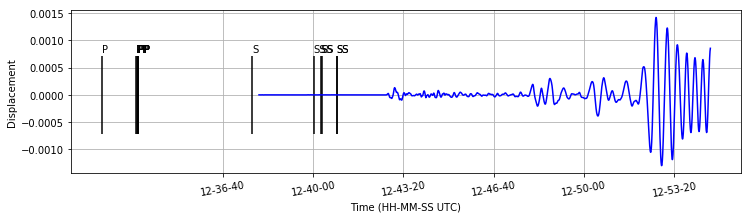

In [5]:
# this will actually run the code if called stand-alone:
if __name__ == '__main__':
    main()